In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import random
import time

In [8]:
def load_data(filename):
    data = pd.read_csv(filename, skiprows=6, sep=' ', names=['index', 'x', 'y'], skipfooter=1, engine='python')
    return data.set_index('index')

def euclidean_distance(p1, p2):
    return round(np.sqrt((p1[0] - p2[0])**2 + (p1[1] - p2[1])**2))

def calculate_distance_matrix(coords):
    size = coords.shape[0]
    matrix = np.zeros((size, size), dtype=int)
    coords_values = coords.values
    for i in range(size):
        for j in range(size):
            if i != j:
                matrix[i][j] = euclidean_distance(coords_values[i], coords_values[j])
            else:
                matrix[i][j] = 0
    return matrix

def initialize_two_greedy_cycles(distance_matrix):
    n = len(distance_matrix)
    start1 = random.randint(0, n-1)
    nearest1 = np.argmin([distance_matrix[start1][i] if i != start1 else np.inf for i in range(n)])
    cycle1 = [start1, nearest1, start1]
    visited = set([start1, nearest1])

    distances_to_start1 = [distance_matrix[start1][i] for i in range(n)]
    start2 = np.argmax(distances_to_start1)
    while start2 in visited:
        distances_to_start1[start2] = -np.inf
        start2 = np.argmax(distances_to_start1)
        
    nearest2 = np.argmin([distance_matrix[start2][i] if i != start2 and i not in visited else np.inf for i in range(n)])
    cycle2 = [start2, nearest2, start2]
    visited.update([start2, nearest2])

    return cycle1, cycle2, visited

def calculate_cycle_length(cycle, distance_matrix):
    total_length = 0
    for i in range(len(cycle)):
        total_length += distance_matrix[cycle[i]][cycle[(i + 1) % len(cycle)]]
    return total_length

def plot_cycles(coords, cycle1, cycle2, title = 'Visualization of Two Cycles'):
    x_coords, y_coords = coords['x'].values, coords['y'].values

    plt.figure(figsize=(10, 8))
    
    
    x1 = [x_coords[i] for i in cycle1]
    y1 = [y_coords[i] for i in cycle1]
    plt.plot(x1, y1, 'ro-', label='Cycle 1')

    
    x2 = [x_coords[i] for i in cycle2]
    y2 = [y_coords[i] for i in cycle2]
    plt.plot(x2, y2, 'bo-', label='Cycle 2')

    plt.scatter(x_coords, y_coords, color='gray', zorder=3)
    
    for i in range(len(x_coords)):
        plt.annotate(str(i), (x_coords[i], y_coords[i]), textcoords="offset points", xytext=(0,10), ha='center')

    plt.title(title)
    plt.xlabel('X Coordinate')
    plt.ylabel('Y Coordinate')
    plt.legend()
    plt.grid(True)
    plt.axis('equal')
    plt.show()



## Heurystyka z 2-żalem (2-regret)

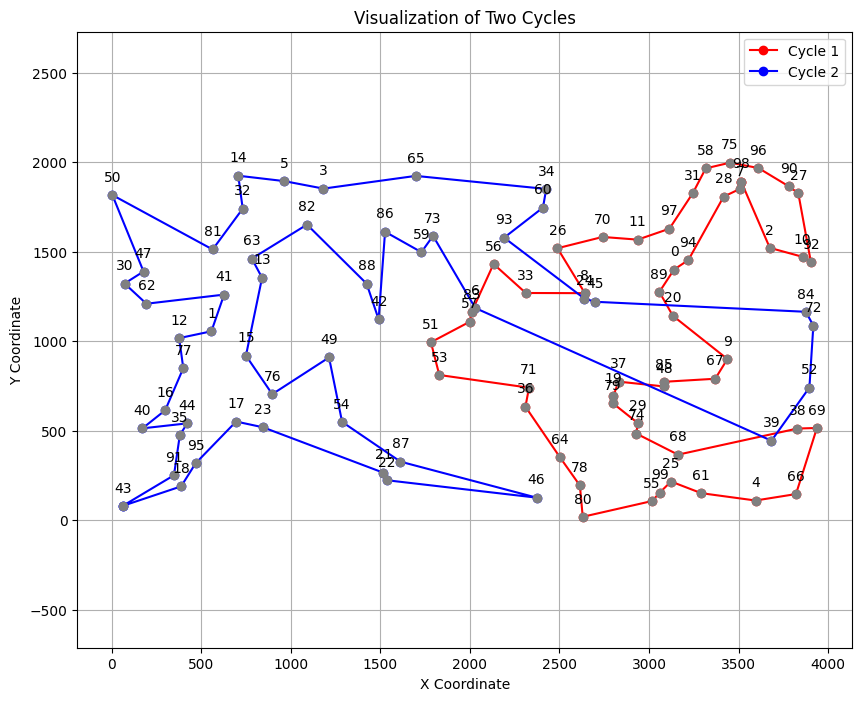

Cycle 1: [98, 2, 10, 92, 27, 90, 96, 75, 58, 31, 97, 11, 70, 26, 8, 33, 56, 83, 57, 51, 53, 71, 36, 64, 78, 80, 55, 99, 25, 61, 4, 66, 69, 38, 68, 74, 29, 79, 19, 37, 48, 85, 67, 9, 20, 89, 0, 94, 28, 7, 98] Length: 10713
Cycle 2: [43, 18, 95, 17, 23, 21, 22, 46, 87, 54, 49, 76, 15, 13, 63, 82, 88, 42, 86, 59, 73, 6, 39, 52, 72, 84, 45, 24, 93, 60, 34, 65, 3, 5, 14, 32, 81, 50, 47, 30, 62, 41, 1, 12, 77, 16, 40, 44, 35, 91, 43] Length: 18378
score: 29091


In [9]:
def insert_with_2_regret(cycle, visited, distance_matrix):
    insertions = []

    for vertex in range(len(distance_matrix)):
        if vertex not in visited:
            insertion_costs = []

            
            for position in range(len(cycle) - 1):
                
                cost_increase = (distance_matrix[cycle[position]][vertex] +
                                 distance_matrix[vertex][cycle[position + 1]] -
                                 distance_matrix[cycle[position]][cycle[position + 1]])
                insertion_costs.append((cost_increase, position))

            
            if len(insertion_costs) >= 2:
                insertion_costs.sort()
                min_cost_1 = insertion_costs[0][0]
                min_cost_2 = insertion_costs[1][0]
                
                
                regret = min_cost_2 - min_cost_1
                weight = regret - 0.37 * min_cost_1

                
                insertions.append((weight, vertex, insertion_costs[0][1]))

    
    insertions.sort(reverse=True)

    if insertions:
        
        highest_regret = insertions[0]
        best_vertex = highest_regret[1]
        best_position = highest_regret[2]

        
        cycle.insert(best_position + 1, best_vertex)
        visited.add(best_vertex)

    return cycle

def expand_cycles_with_2_regret(coords, distance_matrix):
    cycle1, cycle2, visited = initialize_two_greedy_cycles(distance_matrix)
    total_vertices = len(coords)

    while len(visited) < total_vertices:
        if len(visited) < total_vertices:
            cycle1 = insert_with_2_regret(cycle1, visited, distance_matrix)
        if len(visited) < total_vertices:
            cycle2 = insert_with_2_regret(cycle2, visited, distance_matrix)

    return cycle1, cycle2, calculate_cycle_length(cycle1, distance_matrix), calculate_cycle_length(cycle2, distance_matrix)

filename_kroA100 = 'kroA100.tsp'
filename_kroB100 = 'kroB100.tsp'
filenname_kroA200 = 'kroA200.tsp'
filename_kroB200 = 'kroB200.tsp'
coords_A = load_data(filename_kroA100)
coords_B = load_data(filename_kroB100)
coords_A200 = load_data(filenname_kroA200)
coords_B200 = load_data(filename_kroB200)
distance_matrix_A = calculate_distance_matrix(coords_A)
distance_matrix_B = calculate_distance_matrix(coords_B)
distance_matrix_A200 = calculate_distance_matrix(coords_A200)
distance_matrix_B200 = calculate_distance_matrix(coords_B200)
cycle1, cycle2, length1, length2 = expand_cycles_with_2_regret(coords_B, distance_matrix_B)
plot_cycles(coords_B, cycle1, cycle2)
print("Cycle 1:", cycle1, "Length:", length1)
print("Cycle 2:", cycle2 , "Length:", length2)
print("score:", length1 + length2)

# Eksperyment obliczeniowy

In [10]:
def run_2_regret_experiments(filename, num_runs=100):
    coords = load_data(filename)
    distance_matrix = calculate_distance_matrix(coords)

    regret_lengths = []
    best_regret_cycle1, best_regret_cycle2 = None, None
    min_regret_length = float('inf')

    for _ in range(num_runs):
        
        cycle1, cycle2, length1, length2 = expand_cycles_with_2_regret(coords, distance_matrix)
        length = length1 + length2
        regret_lengths.append(length)
        if length < min_regret_length:
            min_regret_length = length
            best_regret_cycle1, best_regret_cycle2 = cycle1, cycle2

    regret_stats = (np.mean(regret_lengths), np.min(regret_lengths), np.max(regret_lengths), best_regret_cycle1, best_regret_cycle2, min_regret_length)
    return regret_stats


filename_kroA100 = 'kroA100.tsp'
filename_kroB100 = 'kroB100.tsp'

regret_stats_A = run_2_regret_experiments(filename_kroA100)
regret_stats_B = run_2_regret_experiments(filename_kroB100)


results = {
    'Instance': ['kroA100', 'kroB100'],
    'Method': ['2-Regret', '2-Regret'],
    'Mean': [regret_stats_A[0], regret_stats_B[0]],
    'Min': [regret_stats_A[1], regret_stats_B[1]],
    'Max': [regret_stats_A[2], regret_stats_B[2]]
}

results_df = pd.DataFrame(results)


best_cycles = {
    'kroA100_2Regret': (regret_stats_A[3], regret_stats_A[4], regret_stats_A[5]),
    'kroB100_2Regret': (regret_stats_B[3], regret_stats_B[4], regret_stats_B[5])
}


results_df = pd.DataFrame(results)
results_df

,Instance,Method,Mean,Min,Max
0,kroA100,2-Regret,26875.56,22914,29510
1,kroB100,2-Regret,27772.55,24172,29378


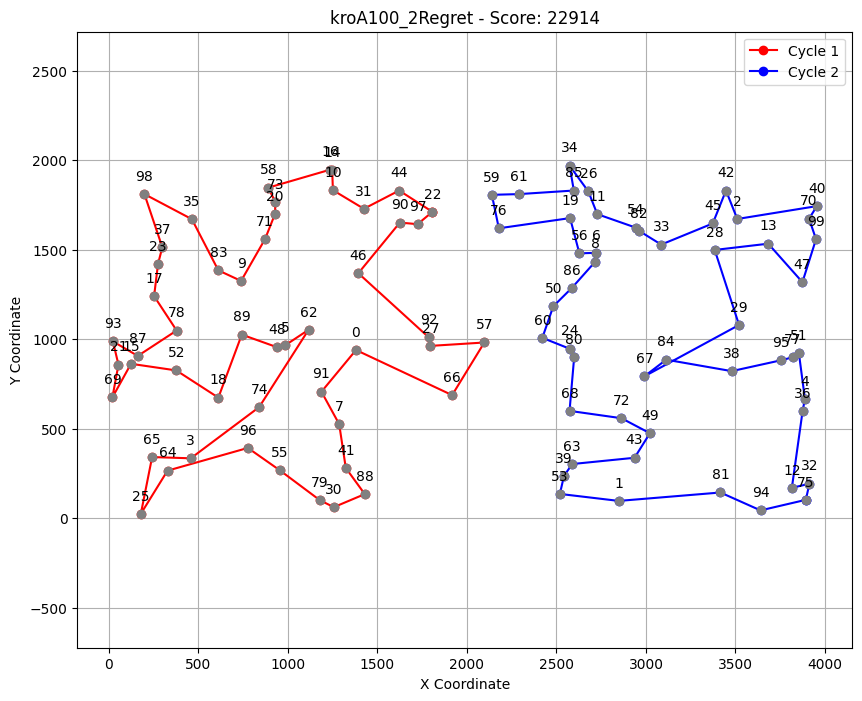

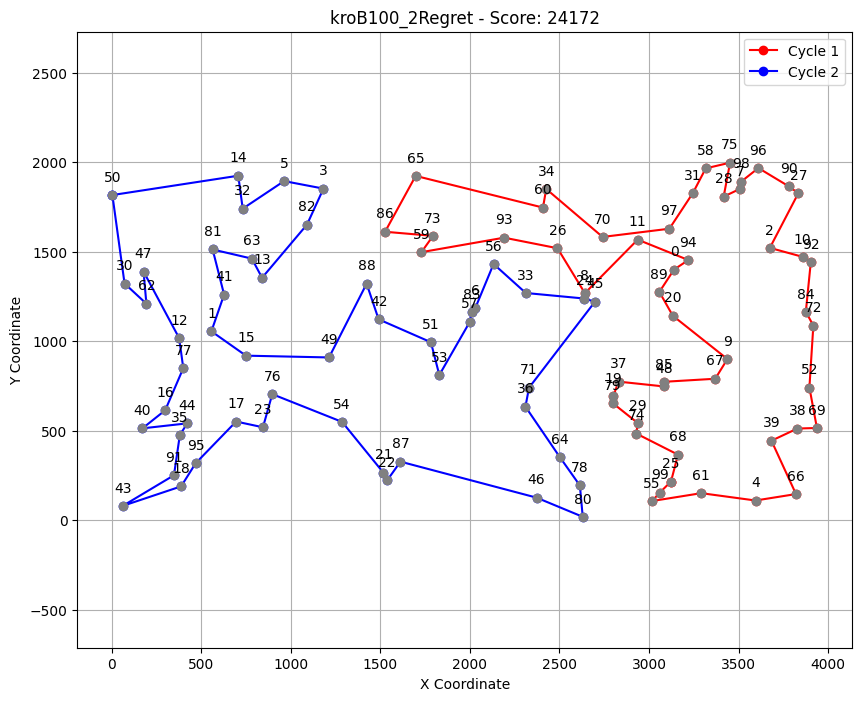

In [11]:

for instance, cycles in best_cycles.items():
    cycle1, cycle2, score = cycles
    coords = load_data(f'{instance.split("_")[0]}.tsp')
    plot_cycles(coords, cycle1, cycle2, title=f'{instance} - Score: {score}')
    

# Funkcje pomocnicze do local search

In [12]:
def create_random_cycles(distance_matrix):
    num_vertices = len(distance_matrix)
    vertices = list(range(num_vertices))
    random.shuffle(vertices)
    mid = num_vertices // 2
    
    cycle1 = vertices[:mid] + [vertices[0]]
    cycle2 = vertices[mid:] + [vertices[mid]]
    
    return cycle1, cycle2

def calculate_score(cycle1, cycle2, distance_matrix):
    length1 = calculate_cycle_length(cycle1, distance_matrix)
    length2 = calculate_cycle_length(cycle2, distance_matrix)
    return length1 + length2

def swap_between_cycles(cycle1, cycle2, idx1, idx2):
    new_cycle1 = cycle1[:]
    new_cycle2 = cycle2[:]
    new_cycle1[idx1], new_cycle2[idx2] = new_cycle2[idx2], new_cycle1[idx1]
    return new_cycle1, new_cycle2

def delta_swap_vertices_between_cycles(cycle1, cycle2, idx1, idx2, distance_matrix):
    vertex1 = cycle1[idx1]
    vertex2 = cycle2[idx2]

    prev_vertex1 = cycle1[idx1 - 1]
    next_vertex1 = cycle1[(idx1 + 1) % len(cycle1)]  
    prev_vertex2 = cycle2[idx2 - 1]
    next_vertex2 = cycle2[(idx2 + 1) % len(cycle2)]  

    
    original_distance = (distance_matrix[prev_vertex1][vertex1] + 
                         distance_matrix[vertex1][next_vertex1] + 
                         distance_matrix[prev_vertex2][vertex2] + 
                         distance_matrix[vertex2][next_vertex2])

    
    new_distance = (distance_matrix[prev_vertex1][vertex2] + 
                    distance_matrix[vertex2][next_vertex1] + 
                    distance_matrix[prev_vertex2][vertex1] + 
                    distance_matrix[vertex1][next_vertex2])

    delta = new_distance - original_distance
    return delta

def swap_within_cycle(cycle, idx1, idx2):
    new_cycle = cycle[:]
    new_cycle[idx1], new_cycle[idx2] = new_cycle[idx2], new_cycle[idx1]
    return new_cycle

def delta_swap_vertices_within_cycle(cycle, idx1, idx2, distance_matrix):
    if idx1 > idx2:
        idx1, idx2 = idx2, idx1

    
    prev_vertex1 = cycle[idx1 - 1]
    vertex1 = cycle[idx1]
    next_vertex1 = cycle[(idx1 + 1) % len(cycle)]
    prev_vertex2 = cycle[idx2 - 1]
    vertex2 = cycle[idx2]
    next_vertex2 = cycle[(idx2 + 1) % len(cycle)]

    
    if idx2 == idx1 + 1:  
        original_distance = (distance_matrix[prev_vertex1][vertex1] + 
                             distance_matrix[vertex2][next_vertex2])
        
        
        new_distance = (distance_matrix[prev_vertex1][vertex2] + 
                        distance_matrix[vertex1][next_vertex2])
    else:
        original_distance = (distance_matrix[prev_vertex1][vertex1] + 
                             distance_matrix[vertex1][next_vertex1] + 
                             distance_matrix[prev_vertex2][vertex2] + 
                             distance_matrix[vertex2][next_vertex2])
        
        
        new_distance = (distance_matrix[prev_vertex1][vertex2] + 
                        distance_matrix[vertex2][next_vertex1] + 
                        distance_matrix[prev_vertex2][vertex1] + 
                        distance_matrix[vertex1][next_vertex2])

    delta = new_distance - original_distance
    return delta

def swap_edges_in_cycle(cycle, idx1, idx2):
    if idx1 > idx2:
        idx1, idx2 = idx2, idx1
    new_cycle = cycle[:idx1+1] + cycle[idx1+1:idx2+1][::-1] + cycle[idx2+1:]
    return new_cycle

def delta_swap_edges_in_cycle(cycle, idx1, idx2, distance_matrix):
    if idx1 > idx2:
        idx1, idx2 = idx2, idx1

    prev_vertex1 = cycle[idx1]
    next_vertex1 = cycle[(idx1 + 1) % len(cycle)]  
    prev_vertex2 = cycle[idx2]
    next_vertex2 = cycle[(idx2 + 1) % len(cycle)]  

    
    original_distance = (distance_matrix[prev_vertex1][next_vertex1] + 
                         distance_matrix[prev_vertex2][next_vertex2])

    
    new_distance = (distance_matrix[prev_vertex1][prev_vertex2] + 
                    distance_matrix[next_vertex1][next_vertex2])

    delta = new_distance - original_distance
    return delta

def generate_all_vertex_swaps_between_cycles(cycle1, cycle2, distance_matrix):
    possible_swaps = []

    for i in range(len(cycle1) - 1):
        for j in range(len(cycle2) - 1):
            delta = delta_swap_vertices_between_cycles(cycle1, cycle2, i, j, distance_matrix)
            
            if delta < 0:  
                new_cycle1, new_cycle2 = swap_between_cycles(cycle1, cycle2, i, j)
                possible_swaps.append((new_cycle1, new_cycle2, delta))
    
    return possible_swaps

def generate_all_vertex_swaps_within_cycles(cycle1, cycle2, distance_matrix):
    possible_swaps = []

    
    for i in range(len(cycle1) - 1):
        for j in range(i + 1, len(cycle1) - 1):
            delta = delta_swap_vertices_within_cycle(cycle1, i, j, distance_matrix)
            if delta < 0:  
                new_cycle1 = swap_within_cycle(cycle1, i, j)
                possible_swaps.append((new_cycle1, cycle2, delta))

    
    for i in range(len(cycle2) - 1):
        for j in range(i + 1, len(cycle2) - 1):
            delta = delta_swap_vertices_within_cycle(cycle2, i, j, distance_matrix)
            if delta < 0:  
                new_cycle2 = swap_within_cycle(cycle2, i, j)
                possible_swaps.append((cycle1, new_cycle2, delta))
    
    return possible_swaps

def generate_all_edge_swaps_within_cycles(cycle1, cycle2, distance_matrix):
    possible_swaps = []

    
    for i in range(len(cycle1) - 1):
        for j in range(i + 1, len(cycle1) - 1):
            delta = delta_swap_edges_in_cycle(cycle1, i, j, distance_matrix)
            if delta < 0:  
                new_cycle1 = swap_edges_in_cycle(cycle1, i, j)
                possible_swaps.append((new_cycle1, cycle2, delta))

    
    for i in range(len(cycle2) - 1):
        for j in range(i + 1, len(cycle2) - 1):
            delta = delta_swap_edges_in_cycle(cycle2, i, j, distance_matrix)
            if delta < 0:  
                new_cycle2 = swap_edges_in_cycle(cycle2, i, j)
                possible_swaps.append((cycle1, new_cycle2, delta))
    
    return possible_swaps

def generate_all_moves(cycle1, cycle2, distance_matrix):
    possible_moves = []
    possible_moves.extend(generate_all_vertex_swaps_between_cycles(cycle1, cycle2, distance_matrix))
    possible_moves.extend(generate_all_vertex_swaps_within_cycles(cycle1, cycle2, distance_matrix))
    possible_moves.extend(generate_all_edge_swaps_within_cycles(cycle1, cycle2, distance_matrix))
    return possible_moves

def generate_combined_moves_list_1(cycle1, cycle2, distance_matrix):
    possible_moves = []
    possible_moves.extend(generate_all_vertex_swaps_between_cycles(cycle1, cycle2, distance_matrix))
    possible_moves.extend(generate_all_vertex_swaps_within_cycles(cycle1, cycle2, distance_matrix))
    return possible_moves

def generate_combined_moves_list_2(cycle1, cycle2, distance_matrix):
    possible_moves = []
    possible_moves.extend(generate_all_vertex_swaps_between_cycles(cycle1, cycle2, distance_matrix))
    possible_moves.extend(generate_all_edge_swaps_within_cycles(cycle1, cycle2, distance_matrix))
    return possible_moves

def generate_all_moves_random(cycle1, cycle2, distance_matrix):
    possible_moves = []

    
    for i in range(len(cycle1) - 1):
        for j in range(len(cycle2) - 1):
            delta = delta_swap_vertices_between_cycles(cycle1, cycle2, i, j, distance_matrix)
            new_cycle1, new_cycle2 = swap_between_cycles(cycle1, cycle2, i, j)
            possible_moves.append((new_cycle1, new_cycle2, delta))  

    
    for i in range(len(cycle1) - 1):
        for j in range(i + 1, len(cycle1) - 1):
            delta = delta_swap_vertices_within_cycle(cycle1, i, j, distance_matrix)
            new_cycle1 = swap_within_cycle(cycle1, i, j)
            possible_moves.append((new_cycle1, cycle2, delta))  

    
    for i in range(len(cycle2) - 1):
        for j in range(i + 1, len(cycle2) - 1):
            delta = delta_swap_vertices_within_cycle(cycle2, i, j, distance_matrix)
            new_cycle2 = swap_within_cycle(cycle2, i, j)
            possible_moves.append((cycle1, new_cycle2, delta))  

    
    for i in range(len(cycle1) - 1):
        for j in range(i + 1, len(cycle1) - 1):
            delta = delta_swap_edges_in_cycle(cycle1, i, j, distance_matrix)
            new_cycle1 = swap_edges_in_cycle(cycle1, i, j)
            possible_moves.append((new_cycle1, cycle2, delta))  

    
    for i in range(len(cycle2) - 1):
        for j in range(i + 1, len(cycle2) - 1):
            delta = delta_swap_edges_in_cycle(cycle2, i, j, distance_matrix)
            new_cycle2 = swap_edges_in_cycle(cycle2, i, j)
            possible_moves.append((cycle1, new_cycle2, delta))  

    return possible_moves

def steepest_ascent_local_search(cycle1, cycle2, distance_matrix, move_list_generator):
    start_time = time.time()
    best_cycle1, best_cycle2 = cycle1, cycle2
    best_score = calculate_score(best_cycle1, best_cycle2, distance_matrix)  
    
    while True:
        possible_moves = move_list_generator(best_cycle1, best_cycle2, distance_matrix)
        best_delta = 0  
        best_move = None  
        
        
        for new_cycle1, new_cycle2, delta in possible_moves:
            if delta < best_delta:  
                best_delta = delta
                best_move = (new_cycle1, new_cycle2)

        if best_move is not None:
            
            best_cycle1, best_cycle2 = best_move
            best_score += best_delta  
        else:
            
            break
    
    end_time = time.time()
    time_taken = end_time - start_time
    
    return best_cycle1, best_cycle2, best_score, time_taken
    
def greedy_local_search(cycle1, cycle2, distance_matrix, move_list_generator):
    start_time = time.time()
    
    best_cycle1, best_cycle2 = cycle1, cycle2
    best_score = calculate_score(best_cycle1, best_cycle2, distance_matrix)
    
    while True:
        possible_moves = move_list_generator(best_cycle1, best_cycle2, distance_matrix)
        
        
        if not possible_moves:  
            break
        
        
        if random.random() < 0.5:
            possible_moves.reverse()
        
        start_index = random.randint(0, len(possible_moves) - 1)
        improved = False
        
        for i in range(len(possible_moves)):
            index = (start_index + i) % len(possible_moves)
            new_cycle1, new_cycle2, delta = possible_moves[index]
            if delta < 0:  
                best_cycle1, best_cycle2 = new_cycle1, new_cycle2
                best_score += delta  
                improved = True
                break
        
        if not improved:
            break
        
    end_time = time.time()
    time_taken = end_time - start_time
    
    return best_cycle1, best_cycle2, best_score, time_taken

def randomized_optimization(cycle1, cycle2, distance_matrix, time_limit):
    start_time = time.time()
    end_time = start_time + time_limit
    
    best_cycle1, best_cycle2 = cycle1, cycle2
    best_score = calculate_score(best_cycle1, best_cycle2, distance_matrix)
    
    while time.time() < end_time:
        
        possible_moves = generate_all_moves_random(best_cycle1, best_cycle2, distance_matrix)
        if not possible_moves:
            break
        
        
        random_move = random.choice(possible_moves)
        new_cycle1, new_cycle2, score = random_move
        
        
        best_cycle1, best_cycle2 = new_cycle1, new_cycle2
        best_score = calculate_score(best_cycle1, best_cycle2, distance_matrix)  
    
    time_taken = time.time() - start_time
    
    return best_cycle1, best_cycle2, best_score, time_taken


In [18]:

def initialize_population(population_size, distance_matrix):
    population = []
    solutions_set = set()  
    
    while len(population) < population_size:
        cycle1, cycle2 = create_random_cycles(distance_matrix)  
        cycle1, cycle2, score, _ = steepest_ascent_local_search(cycle1, cycle2, distance_matrix, generate_combined_moves_list_2)
        
        
        if score not in solutions_set:
            population.append((cycle1, cycle2, score))
            solutions_set.add(score)
    
    return population

def repair_solution(cycle1, cycle2, remaining_vertices, distance_matrix):
    visited = set(cycle1 + cycle2)
    remaining_vertices = set(remaining_vertices)  
    while remaining_vertices:
        cycle1 = insert_with_2_regret(cycle1, visited, distance_matrix)
        remaining_vertices -= visited  
        if remaining_vertices:
            cycle2 = insert_with_2_regret(cycle2, visited, distance_matrix)
            remaining_vertices -= visited
    return cycle1, cycle2

def recombination(parent1, parent2, distance_matrix):
    cycle1_parent1, cycle2_parent1, _ = parent1
    cycle1_parent2, cycle2_parent2, _ = parent2

    
    def has_edge(cycle, v1, v2):
        n = len(cycle)
        for i in range(n):
            if (cycle[i] == v1 and cycle[(i + 1) % n] == v2) or (cycle[i] == v2 and cycle[(i + 1) % n] == v1):
                return True
        return False

    
    offspring_cycle1 = []
    for i in range(len(cycle1_parent1)):
        v1 = cycle1_parent1[i]
        v2 = cycle1_parent1[(i + 1) % len(cycle1_parent1)]
        
        if has_edge(cycle1_parent2, v1, v2) or has_edge(cycle2_parent2, v1, v2):
            offspring_cycle1.append(v1)

    offspring_cycle2 = []
    for i in range(len(cycle2_parent1)):
        v1 = cycle2_parent1[i]
        v2 = cycle2_parent1[(i + 1) % len(cycle2_parent1)]
        if has_edge(cycle1_parent2, v1, v2) or has_edge(cycle2_parent2, v1, v2):
            offspring_cycle2.append(v1)

    
    def remove_free_floating_vertices(cycle):
        cleaned_cycle = []
        n = len(cycle)
        for i in range(n):
            prev_vertex = cycle[i - 1]
            next_vertex = cycle[(i + 1) % n]
            current_vertex = cycle[i]
            if prev_vertex != current_vertex and next_vertex != current_vertex:
                cleaned_cycle.append(current_vertex)
        return cleaned_cycle

    offspring_cycle1 = remove_free_floating_vertices(offspring_cycle1)
    offspring_cycle2 = remove_free_floating_vertices(offspring_cycle2)

    
    remaining_vertices = set(range(len(distance_matrix))) - set(offspring_cycle1) - set(offspring_cycle2)

    
    repaired_cycle1, repaired_cycle2= repair_solution(offspring_cycle1, offspring_cycle2, list(remaining_vertices), distance_matrix)
    
    return repaired_cycle1, repaired_cycle2

def steady_state_selection(population, distance_matrix, max_iterations=1000, time_limit=60):
    population_size = len(population)
    iteration = 0
    start_time = time.time()  
    
    
    best_scores = []
    worst_scores = []

    while iteration < max_iterations:
        elapsed_time = time.time() - start_time
        if elapsed_time >= time_limit:
            print(f"Time limit of {time_limit} seconds reached. Stopping the algorithm.")
            break
        
        print(f'Iteration {iteration + 1}/{max_iterations} (Elapsed Time: {elapsed_time:.2f}s)')
        
        
        current_best_score = min(population, key=lambda indiv: indiv[2])[2]
        current_worst_score = max(population, key=lambda indiv: indiv[2])[2]
        best_scores.append(current_best_score)
        worst_scores.append(current_worst_score)

        
        parent1, parent2 = random.sample(population, 2)

        
        offspring_cycle1, offspring_cycle2 = recombination(parent1, parent2, distance_matrix)

        
        offspring_cycle1, offspring_cycle2, offspring_score, _ = steepest_ascent_local_search(
            offspring_cycle1, offspring_cycle2, distance_matrix, generate_combined_moves_list_2
        )

        
        if offspring_score not in [indiv[2] for indiv in population]:
            
            worst_solution = max(population, key=lambda indiv: indiv[2])

            
            if offspring_score < worst_solution[2]:
                population.remove(worst_solution)
                population.append((offspring_cycle1, offspring_cycle2, offspring_score))
                print(f'Replaced worst solution with offspring (Score: {offspring_score})')

        iteration += 1

    
    best_solution = min(population, key=lambda indiv: indiv[2])

    
    score_data = pd.DataFrame({
        'Iteration': range(1, iteration + 1),
        'Best_Score': best_scores,
        'Worst_Score': worst_scores
    })

    return best_solution, score_data

def hybrid_evolutionary_algorithm(distance_matrix, population_size=20, max_iterations=1000, time_limit=60):
    
    population = initialize_population(population_size, distance_matrix)
    
    
    best_solution, score_data = steady_state_selection(population, distance_matrix, max_iterations, time_limit)
    
    return best_solution, score_data


In [25]:
def run_hae_experiment(distance_matrix, coords, population_size=20, max_iterations=1000, time_limit=60):
    
    best_solution, score_data = hybrid_evolutionary_algorithm(
        distance_matrix, population_size=population_size, max_iterations=max_iterations, time_limit=time_limit
    )

    
    plot_cycles(coords, best_solution[0], best_solution[1], title = 'Best Solution from HEA, score: ' + str(best_solution[2]))
    print("Best score found:", best_solution[2])

    
    plt.plot(score_data['Iteration'], score_data['Best_Score'], label='Best Score')
    plt.plot(score_data['Iteration'], score_data['Worst_Score'], label='Worst Score', linestyle='--')
    plt.xlabel('Iteration')
    plt.ylabel('Score')
    plt.title('Best and Worst Scores Over Iterations')
    plt.legend()
    plt.grid(True)
    plt.show()

    return best_solution, score_data

Iteration 1/700 (Elapsed Time: 0.00s)
Replaced worst solution with offspring (Score: 38648)
Iteration 2/700 (Elapsed Time: 0.84s)
Replaced worst solution with offspring (Score: 36286)
Iteration 3/700 (Elapsed Time: 1.59s)
Replaced worst solution with offspring (Score: 35841)
Iteration 4/700 (Elapsed Time: 2.07s)
Replaced worst solution with offspring (Score: 37021)
Iteration 5/700 (Elapsed Time: 2.59s)
Replaced worst solution with offspring (Score: 37458)
Iteration 6/700 (Elapsed Time: 3.07s)
Replaced worst solution with offspring (Score: 36000)
Iteration 7/700 (Elapsed Time: 3.57s)
Replaced worst solution with offspring (Score: 36193)
Iteration 8/700 (Elapsed Time: 4.32s)
Replaced worst solution with offspring (Score: 35490)
Iteration 9/700 (Elapsed Time: 4.74s)
Replaced worst solution with offspring (Score: 35368)
Iteration 10/700 (Elapsed Time: 5.28s)
Replaced worst solution with offspring (Score: 36772)
Iteration 11/700 (Elapsed Time: 5.78s)
Replaced worst solution with offspring (

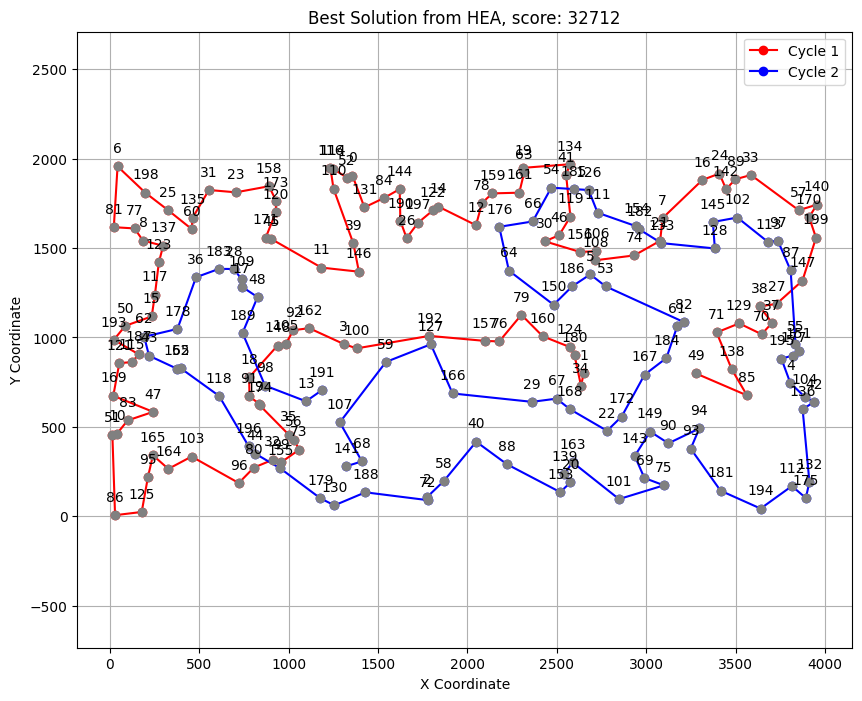

Best score found: 32712


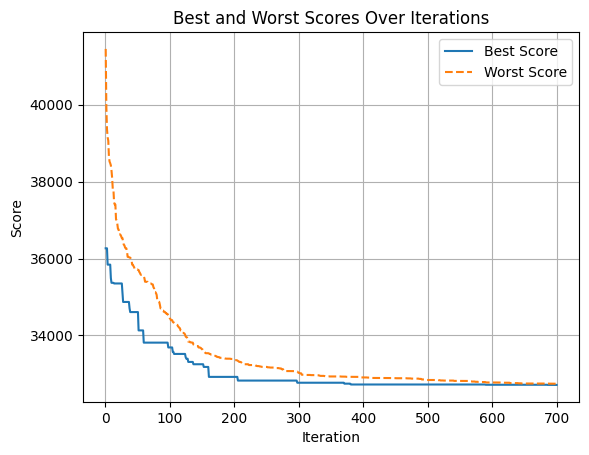

In [27]:

best_solution, score_data = run_hae_experiment(distance_matrix_A200, coords_A200, population_size=20, max_iterations=700, time_limit=600)

Iteration 1/700 (Elapsed Time: 0.00s)
Replaced worst solution with offspring (Score: 36810)
Iteration 2/700 (Elapsed Time: 0.82s)
Replaced worst solution with offspring (Score: 36765)
Iteration 3/700 (Elapsed Time: 1.67s)
Replaced worst solution with offspring (Score: 39566)
Iteration 4/700 (Elapsed Time: 2.66s)
Replaced worst solution with offspring (Score: 37541)
Iteration 5/700 (Elapsed Time: 3.41s)
Replaced worst solution with offspring (Score: 36511)
Iteration 6/700 (Elapsed Time: 4.29s)
Replaced worst solution with offspring (Score: 36318)
Iteration 7/700 (Elapsed Time: 4.82s)
Replaced worst solution with offspring (Score: 39510)
Iteration 8/700 (Elapsed Time: 5.47s)
Replaced worst solution with offspring (Score: 37726)
Iteration 9/700 (Elapsed Time: 6.44s)
Replaced worst solution with offspring (Score: 35923)
Iteration 10/700 (Elapsed Time: 7.14s)
Replaced worst solution with offspring (Score: 36351)
Iteration 11/700 (Elapsed Time: 7.63s)
Replaced worst solution with offspring (

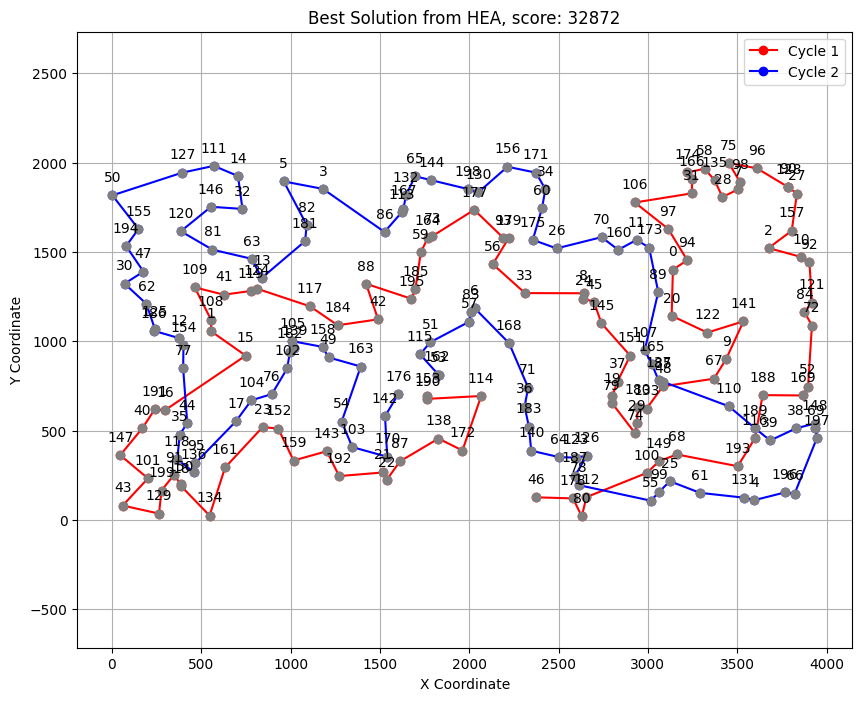

Best score found: 32872


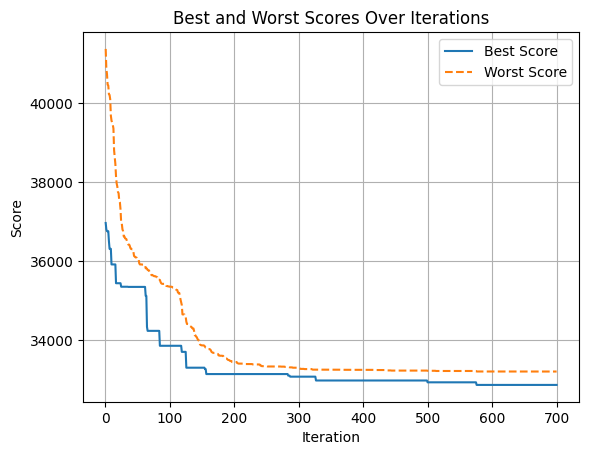

In [28]:
best_solutionB, score_dataB = run_hae_experiment(distance_matrix_B200, coords_B200, population_size=20, max_iterations=700, time_limit=600)